In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from neuralprophet import NeuralProphet
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Data importing

In [2]:
df= pd.read_csv("C:/Users/PC/Downloads/Respodents summary(1).csv")

In [3]:
df.head()

,Respondent,Gender,Age,Years of Experience,Virtual working befor Covid,Size of Team,Nature of company,Mode of Communication,Most Prvalent Problem,Eployee Well-Being,Recoomendation
0,R1,Male,35,32 to 35,No,10,Service,Email,Internet connectivity,Yes,Blended working
1,R2,Female,42,0 to 3,Yes,15,Production,Social Media,Disruptions,Yes,Complete resumption
2,R3,Female,65,8 t0 11,No,35,Service,Email,Delays,Yes,Blended working
3,R4,Female,33,8 to 11,No,20,Service,Virtual Meetings,Delays,Yes,Complete resumption
4,R5,Male,29,8 to 11,No,50,Production,Email,Disruptions,No,Remort Working


## Data cleaning and analysis

In [4]:
df.shape

(15, 11)

In [5]:
df.columns

Index(['Respondent', 'Gender', 'Age', 'Years of Experience',
       'Virtual working befor Covid', 'Size of Team', 'Nature of company',
       'Mode of Communication', 'Most Prvalent Problem', 'Eployee Well-Being',
       'Recoomendation'],
      dtype='object')

In [6]:
df.dtypes

Respondent                     object
Gender                         object
Age                             int64
Years of Experience            object
Virtual working befor Covid    object
Size of Team                    int64
Nature of company              object
Mode of Communication          object
Most Prvalent Problem          object
Eployee Well-Being             object
Recoomendation                 object
dtype: object

In [7]:
df.isnull().sum()

Respondent                     0
Gender                         0
Age                            0
Years of Experience            0
Virtual working befor Covid    0
Size of Team                   0
Nature of company              0
Mode of Communication          0
Most Prvalent Problem          0
Eployee Well-Being             0
Recoomendation                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe(include='object')

,Respondent,Gender,Years of Experience,Virtual working befor Covid,Nature of company,Mode of Communication,Most Prvalent Problem,Eployee Well-Being,Recoomendation
count,15,15,15,15,15,15,15,15,15
unique,15,2,8,2,2,4,3,2,3
top,R1,Female,8 to 11,No,Service,Email,Internet connectivity,Yes,Blended working
freq,1,10,5,12,10,8,8,11,8


In [10]:
df.describe()

,Age,Size of Team
count,15.000000,15.000000
mean,47.333333,19.133333
std,13.058477,11.691674
min,29.000000,5.000000
25%,36.000000,12.000000
50%,43.000000,15.000000
75%,57.500000,21.500000
max,70.000000,50.000000


In [11]:
for i in df.select_dtypes(include="object").columns:
    print("---------------------------------------")
    print(df[i].value_counts())

---------------------------------------
Respondent
R1     1
R2     1
R3     1
R4     1
R5     1
R6     1
R7     1
R8     1
R9     1
R10    1
R11    1
R12    1
R13    1
R14    1
R15    1
Name: count, dtype: int64
---------------------------------------
Gender
Female    10
Male       5
Name: count, dtype: int64
---------------------------------------
Years of Experience
8 to 11     5
0 to 3      2
4 to 7      2
8 to11      2
32 to 35    1
0 to  3     1
8 t0 11     1
 0 to 3     1
Name: count, dtype: int64
---------------------------------------
Virtual working befor Covid
No     12
Yes     3
Name: count, dtype: int64
---------------------------------------
Nature of company
Service       10
Production     5
Name: count, dtype: int64
---------------------------------------
Mode of Communication
Email               8
Virtual Meetings    4
Social Media        2
Email               1
Name: count, dtype: int64
---------------------------------------
Most Prvalent Problem
Internet connectivity

## Visualizations

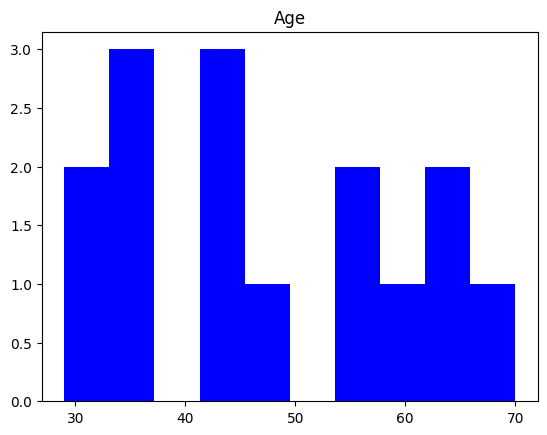

In [12]:
df.hist(column="Age",color="blue",grid=False)
plt.show()

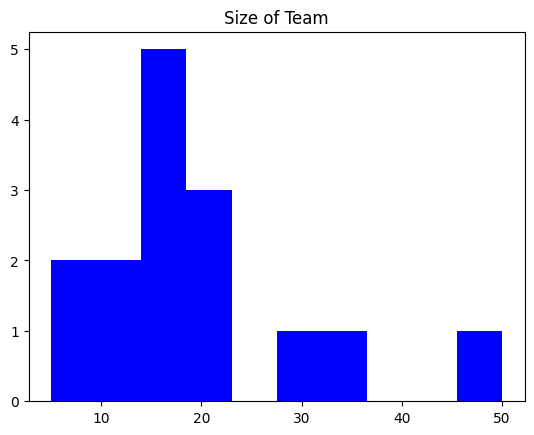

In [13]:
df.hist(column="Size of Team",color="blue",grid=False)
plt.show()

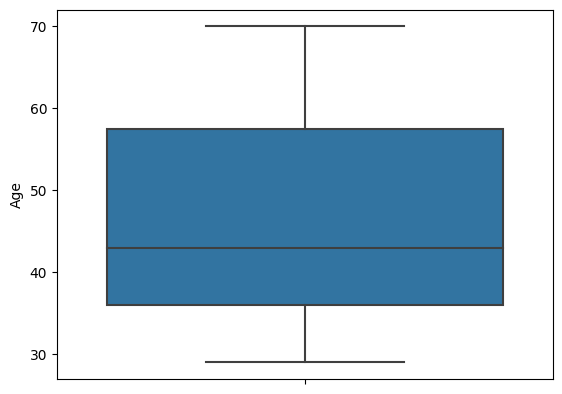

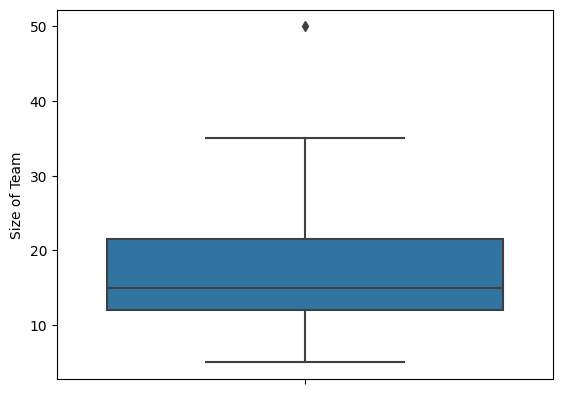

In [14]:
#Scatterplot for variables in a list
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, y=i)
    plt.show()

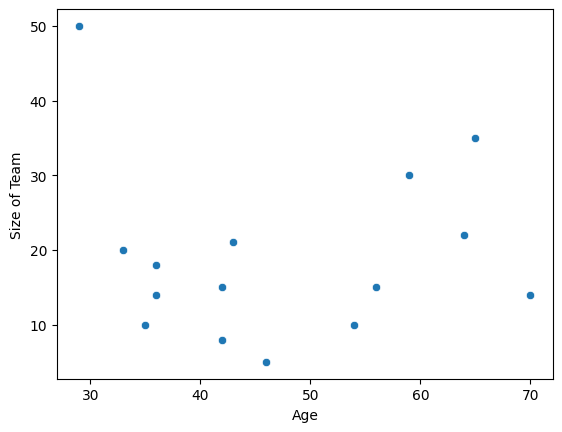

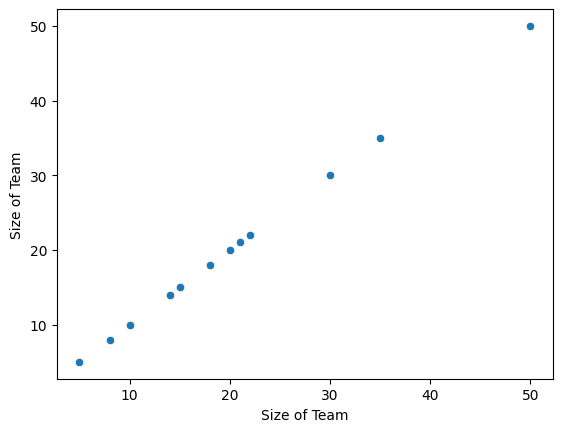

In [15]:
#Scatterplot for variables in a list
for i in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df, x=i,y="Size of Team")
    plt.show()

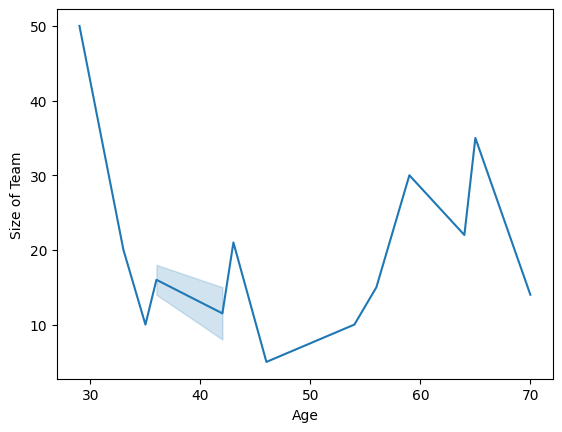

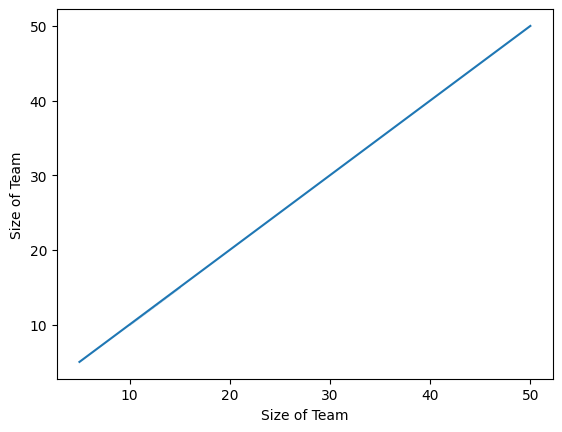

In [16]:
for i in df.select_dtypes(include="number").columns:
    sns.lineplot(data=df, x=i,y="Size of Team")
    plt.show()

## DATA PREPROCESSING FOR MODELLING

In [17]:
#Data Encoding
df[['Respondent', 'Gender', 'Age', 'Years of Experience',
       'Virtual working befor Covid', 'Size of Team', 'Nature of company',
       'Mode of Communication', 'Most Prvalent Problem', 'Eployee Well-Being',
       'Recoomendation']]=df[['Respondent', 'Gender', 'Age', 'Years of Experience',
       'Virtual working befor Covid', 'Size of Team', 'Nature of company',
       'Mode of Communication', 'Most Prvalent Problem', 'Eployee Well-Being',
       'Recoomendation']].apply(LabelEncoder().fit_transform)

In [18]:
#Correcting the variable names
df.columns = df.columns.str.replace(' ', '_')

In [19]:
df.head()

,Respondent,Gender,Age,Years_of_Experience,Virtual_working_befor_Covid,Size_of_Team,Nature_of_company,Mode_of_Communication,Most_Prvalent_Problem,Eployee_Well-Being,Recoomendation
0,0,1,2,3,0,2,1,0,2,1,0
1,7,0,4,1,1,4,0,2,1,1,1
2,8,0,11,5,0,10,1,0,0,1,0
3,9,0,1,6,0,6,1,3,0,1,1
4,10,1,0,6,0,11,0,0,1,0,2


In [20]:
df.columns

Index(['Respondent', 'Gender', 'Age', 'Years_of_Experience',
       'Virtual_working_befor_Covid', 'Size_of_Team', 'Nature_of_company',
       'Mode_of_Communication', 'Most_Prvalent_Problem', 'Eployee_Well-Being',
       'Recoomendation'],
      dtype='object')

In [21]:
#Separating independent and dependent variables from the dataset by creating lists
X=df[['Gender', 'Age', 'Years_of_Experience',
       'Virtual_working_befor_Covid', 'Size_of_Team', 'Nature_of_company',
       'Mode_of_Communication', 'Most_Prvalent_Problem',
       'Recoomendation']]
Y=df['Eployee_Well-Being']

In [22]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#### CHOOSING THE BEST MODEL BETWEEN LOGISTIC REGRESSION AND ADABOOST MODEL BY COMPARING ACCURACY

### a) Logistic regression

In [23]:
logistic_regression = LogisticRegression()  # Initialize Logistic Regression model
logistic_regression.fit(X_train, Y_train)  # Train the model on the training data

LogisticRegression()

In [24]:
#printing model coeeficients
print('Intercept: ', logistic_regression.intercept_)
#Pairing the ind.variables names with their coefficients
list(zip(X, logistic_regression.coef_))

Intercept:  [4.33956651]


[('Gender',
  array([-0.34445918,  0.6466558 , -1.03024076,  0.00811441, -0.16442916,
          0.01538972, -0.22839423, -0.16229831,  0.17900049]))]

In [25]:
#predicting the test and train set result
Y_Pred=logistic_regression.predict(X_test)
X_Pred=logistic_regression.predict(X_train)

In [26]:
#Evaluating the metrics
mae = metrics.mean_absolute_error(Y_test,Y_Pred)
mse = metrics.mean_squared_error(Y_test,Y_Pred)
R2 = np.sqrt(metrics.mean_squared_error(Y_test,Y_Pred))
print("Mean Absolute error :", mae)
print("Mean Squared Error :", mse)
print("Root mean Squared error :", R2)

Mean Absolute error : 0.4
Mean Squared Error : 0.4
Root mean Squared error : 0.6324555320336759


In [27]:
# Evaluate the accuracy of the trained model on the test data
accuracy = logistic_regression.score(X_test, Y_test) 
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100)) 

Logistic Regression Accuracy: 60.00%


### b)THE AdaBoost Classifier

In [28]:
ab = AdaBoostClassifier()
ab.fit(X_train, Y_train)

AdaBoostClassifier()

In [29]:
ab.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [30]:
params = ab.get_params()
print("AdaBoost Classifier Parameters:")
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

AdaBoost Classifier Parameters:
algorithm : SAMME.R
base_estimator : deprecated
estimator : None
learning_rate : 1.0
n_estimators : 50
random_state : None


In [31]:
# feature importance refers to the relative contribution of each feature to the final prediction made by the ensemble model.
feature_importances = ab.feature_importances_
# Pairing feature names with their importances
importance_per_feature = list(zip(X.columns, feature_importances))
print("Feature Importances:")
for feature, importance in importance_per_feature:
    print(feature, ':', importance)

Feature Importances:
Gender : 0.5
Age : 0.0
Years_of_Experience : 0.5
Virtual_working_befor_Covid : 0.0
Size_of_Team : 0.0
Nature_of_company : 0.0
Mode_of_Communication : 0.0
Most_Prvalent_Problem : 0.0
Recoomendation : 0.0


#### Interpretation


The feature importances you provided are the relative importance values assigned to each feature by the AdaBoost model.

Gender and Years_of_Experience: These features have an importance value of 0.5. It indicates that they considered relatively important by the AdaBoost model in making predictions.
However, Age, Virtual_working_befor_Covid, Size_of_Team, Nature_of_company, Mode_of_Communication, Most_Prvalent_Problem and Recoomendation: These features have importance values of 0.0. It suggests that these features are not utilized significantly in the AdaBoost model for making predictions.

In [32]:
# Evaluate accuracy
accuracy=ab.score(X_test,Y_test)
print("Ab Accuracy:{:.2f}%".format(accuracy*100))

Ab Accuracy:80.00%


In [34]:
#predicting values from GridSearchCV
y_pred =ab.predict(X_test)
# show classification report on test data
print(classification_report(Y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

